<a href="https://colab.research.google.com/github/janzaw04/myTestRep/blob/main/%C4%87wiczenie1domowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import math  as m
import numpy as np

# liczby losowe
import random

# grafika do wykresów
import matplotlib.pyplot as plt
import matplotlib as mpl

# działania na łańcuchach znaków
import string 

# statystyka
import statistics as st

# pomar czasu
import time

# dopasowywanie krzywych do danych
from scipy.optimize import curve_fit

# wyświetlanie importowanej grafiki
from IPython.display import display, Image

# wykresy konturowe
import matplotlib.cm as cm

#Załączone pakiety


In [33]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib as mpl

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [34]:
def trian():
    x1=random.random()
    x2=random.random()
    if (1.2-x1-x2>0) and (-0.2+x1>0) and (-0.2+x2)>0:
        c=1
    else:
        c=0
    return np.array([x1,x2,c])

#Przygotowanie danych

In [35]:
probka_k=np.array([trian() for i in range(6200)])
print(probka_k.shape)

(6200, 3)


In [36]:
def draw_result(X,y): 
  fig=plt.figure(figsize=(5,5))

  # dorysowanie okręgu
  #ax=fig.add_subplot(1,1,1)
  #circ=plt.Circle((0.5,0.5), radius=.4, color='black', fill=False)
  #ax.add_patch(circ)

  plt.title("Działanie na próbce testowej",fontsize=16) 
  plt.xlim(min(X[:,0]),max(X[:,0]))
  plt.ylim(min(X[:,1]),max(X[:,1]))
  plt.scatter(X[:,0],X[:,1],c=y,
            s=5,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=min(y), vmax=max(y)))

  plt.xlabel('$x_1$',fontsize=18)
  plt.ylabel('$x_2$',fontsize=18);

#Przygotowanie formatu danych

Shapes of datasets X_train, X_test, y_train, y_test:  (3100, 2) (3100, 2) (3100,) (3100,)


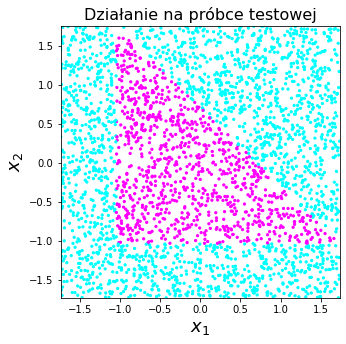

In [37]:
X, y = probka_k[:,:2], probka_k[:,2]

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)

print("Shapes of datasets X_train, X_test, y_train, y_test: ",X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#narysuj dane testowe
draw_result(X_test, y_test)

In [38]:
clf = MLPClassifier(hidden_layer_sizes=(5,5), activation='tanh', alpha=0.1, 
                    learning_rate_init=0.01, early_stopping=True,validation_fraction=0.15,verbose=True,n_iter_no_change=100,max_iter=1000)
                    #max_iter=1000) 


print(clf.fit(X_train, y_train))

# get score
score = clf.score(X_test, y_test)
print("Score = ",score)

# get prediction
Z = clf.predict_proba(X_test)[:,1] # returns probability 
print(Z)

Iteration 1, loss = 0.65357426
Validation score: 0.675269
Iteration 2, loss = 0.62491763
Validation score: 0.675269
Iteration 3, loss = 0.59381147
Validation score: 0.675269
Iteration 4, loss = 0.55447928
Validation score: 0.748387
Iteration 5, loss = 0.50990133
Validation score: 0.817204
Iteration 6, loss = 0.46045650
Validation score: 0.879570
Iteration 7, loss = 0.41569426
Validation score: 0.881720
Iteration 8, loss = 0.36986261
Validation score: 0.905376
Iteration 9, loss = 0.33426618
Validation score: 0.918280
Iteration 10, loss = 0.30558388
Validation score: 0.929032
Iteration 11, loss = 0.28156384
Validation score: 0.929032
Iteration 12, loss = 0.26166280
Validation score: 0.935484
Iteration 13, loss = 0.24768082
Validation score: 0.935484
Iteration 14, loss = 0.23348701
Validation score: 0.941935
Iteration 15, loss = 0.22233777
Validation score: 0.922581
Iteration 16, loss = 0.21039298
Validation score: 0.961290
Iteration 17, loss = 0.20239045
Validation score: 0.956989
Iterat

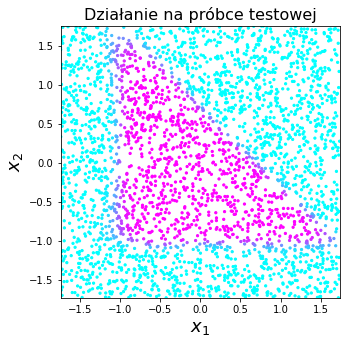

In [39]:
draw_result(X_test,Z)

[0.6752688172043011, 0.6752688172043011, 0.6752688172043011, 0.7483870967741936, 0.8172043010752689, 0.8795698924731182, 0.8817204301075269, 0.9053763440860215, 0.9182795698924732, 0.9290322580645162, 0.9290322580645162, 0.9354838709677419, 0.9354838709677419, 0.9419354838709677, 0.9225806451612903, 0.9612903225806452, 0.956989247311828, 0.9548387096774194, 0.9419354838709677, 0.9419354838709677, 0.9698924731182795, 0.9591397849462365, 0.978494623655914, 0.9741935483870968, 0.967741935483871, 0.9741935483870968, 0.967741935483871, 0.9655913978494624, 0.946236559139785, 0.9763440860215054, 0.9741935483870968, 0.9526881720430107, 0.9741935483870968, 0.956989247311828, 0.9741935483870968, 0.9655913978494624, 0.9720430107526882, 0.9806451612903225, 0.9741935483870968, 0.9655913978494624, 0.9763440860215054, 0.9763440860215054, 0.9806451612903225, 0.9827956989247312, 0.9698924731182795, 0.967741935483871, 0.967741935483871, 0.9741935483870968, 0.9763440860215054, 0.9698924731182795, 0.96344

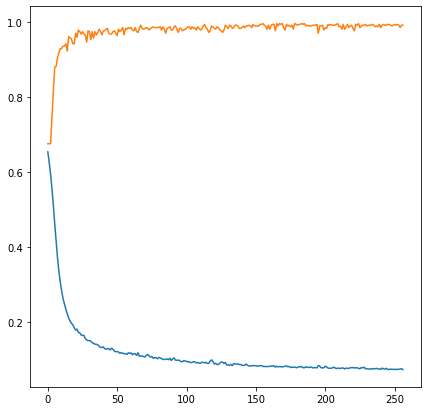

In [40]:
fig=plt.figure(figsize=(7,7))

plt.plot(clf.loss_curve_)
#Warning: thiscan be usedonly if early_stopping=True
print(clf.validation_scores_)
plt.plot(np.asarray(clf.validation_scores_))

plt.show()

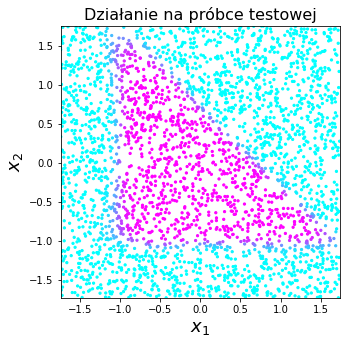

In [41]:
draw_result(X_test, Z)

#Krzywa ROC

<Figure size 504x504 with 0 Axes>

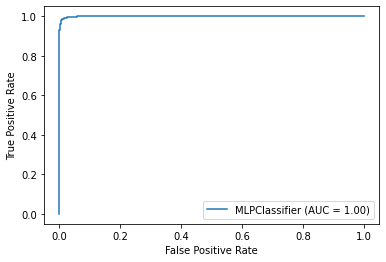

Area Under Curve AUC =  0.9993562116203082
Area Under Curve AUC =  0.9993562116203082


In [42]:
from sklearn.metrics import plot_roc_curve, auc, roc_curve, roc_auc_score

fig=plt.figure(figsize=(7,7))

roc_disp = plot_roc_curve(clf, X_test, y_test)
plt.show()

#Print AUC
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
print("Area Under Curve AUC = ",roc_auc)

#simpler method
print("Area Under Curve AUC = ",roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))